In [9]:
import numpy as np                      
import pandas as pd                    
import matplotlib.pyplot as plt        
import seaborn as sns     
import warnings
warnings.filterwarnings('ignore')

In [10]:
import pandas as pd
df=pd.read_csv('nuzvid.csv')
df.head()

,time,"Lat: 17.0000, Lon: 80.0000"
0,1924-01-01,0.0
1,1924-01-02,0.0
2,1924-01-03,0.0
3,1924-01-04,0.0
4,1924-01-05,0.0


In [11]:
df.describe()

,"Lat: 17.0000, Lon: 80.0000"
count,36891.000000
mean,2.624655
std,9.717061
min,0.000000
25%,0.000000
50%,0.000000
75%,0.251570
max,341.219299


In [12]:
df.columns

Index(['time', 'Lat: 17.0000, Lon: 80.0000'], dtype='object')

In [13]:
df = df.rename(columns={df.columns[1]: 'Rainfall_mm'})
df

,time,Rainfall_mm
0,1924-01-01,0.0
1,1924-01-02,0.0
2,1924-01-03,0.0
3,1924-01-04,0.0
4,1924-01-05,0.0
...,...,...
36886,2024-12-27,0.0
36887,2024-12-28,0.0
36888,2024-12-29,0.0
36889,2024-12-30,0.0


In [14]:
df['Rainfall_mm'].value_counts()

Rainfall_mm
0.000000     26879
0.293965        16
0.109173        16
0.138878        13
0.172810        13
             ...  
11.375271        1
8.588369         1
5.455010         1
0.741633         1
0.779369         1
Name: count, Length: 8824, dtype: int64

In [15]:
df['time'] = pd.to_datetime(df['time'], errors='coerce')


In [16]:
x=df[df['Rainfall_mm']!=0.000000]
print(x)

            time  Rainfall_mm
43    1924-02-13     1.138874
123   1924-05-03     5.205294
124   1924-05-04     0.166858
126   1924-05-06     0.197726
139   1924-05-19     0.180762
...          ...          ...
36861 2024-12-02     0.590970
36864 2024-12-05     0.539709
36879 2024-12-20     0.144838
36884 2024-12-25     1.548654
36885 2024-12-26     1.177457

[10012 rows x 2 columns]


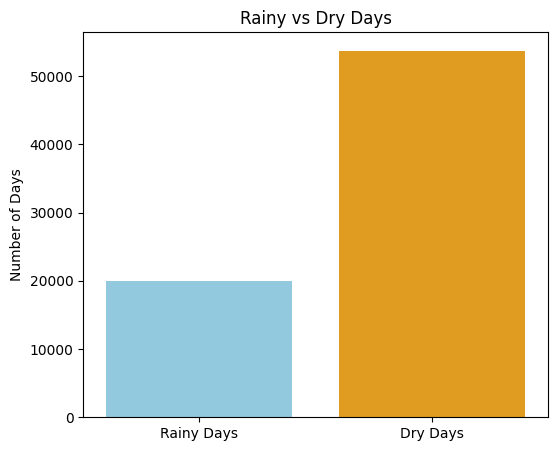

In [17]:
rain=x.size
dry=df.size-x.size
print()
plt.figure(figsize=(6, 5))
sns.barplot(x=['Rainy Days', 'Dry Days'], y=[rain, dry], palette=['skyblue', 'orange'])
plt.title('Rainy vs Dry Days')
plt.ylabel('Number of Days')
plt.show()

In [18]:
y = df[(df['time'].dt.month == 7) & (df['time'].dt.day == 28)]
y

,time,Rainfall_mm
209,1924-07-28,6.812204
574,1925-07-28,19.502851
939,1926-07-28,0.000000
1304,1927-07-28,0.000000
1670,1928-07-28,2.982354
...,...,...
35273,2020-07-28,0.000000
35638,2021-07-28,0.000000
36003,2022-07-28,0.000000
36368,2023-07-28,0.039646


In [19]:
df.to_csv('cleaned_rain.csv',index=False)


In [20]:
df = pd.read_csv('cleaned_rain.csv', parse_dates=['time'])

Probability of Rain: 68.3%

--- Visualization 1: Probability for a Specific Day ---


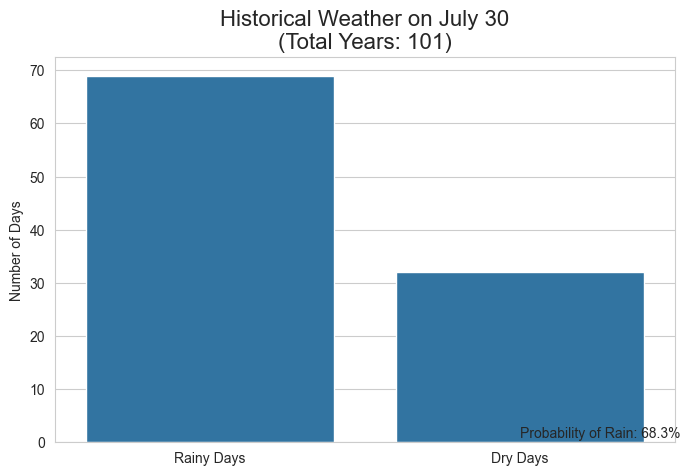

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar # To get month names
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

def visualize_single_day_probability(df, target_month, target_day):
    relevant_dates = df[(df['time'].dt.month == target_month) & (df['time'].dt.day == target_day)]
    if len(relevant_dates) == 0:
        print(f"No historical data available for ")
        return

    rainy_day_count = (relevant_dates['Rainfall_mm'] > 0).sum()
    dry_day_count = len(relevant_dates) - rainy_day_count
    probability = rainy_day_count / len(relevant_dates)
    print(f'Probability of Rain: {probability:.1%}')
    counts = {'Rainy Days': rainy_day_count, 'Dry Days': dry_day_count}

    plt.figure(figsize=(8, 5))
    sns.barplot(x=list(counts.keys()), y=list(counts.values()))
    
    plt.title(f'Historical Weather on {calendar.month_name[target_month]} {target_day}\n(Total Years: {len(relevant_dates)})', fontsize=16)
    plt.ylabel('Number of Days', )
    plt.text(x=1, y=0.8, s=f'Probability of Rain: {probability:.1%}')
    print(f"\n--- Visualization 1: Probability for a Specific Day ---")
    plt.show()

visualize_single_day_probability(df, target_month=7, target_day=30)


In [22]:
df

,time,Rainfall_mm
0,1924-01-01,0.0
1,1924-01-02,0.0
2,1924-01-03,0.0
3,1924-01-04,0.0
4,1924-01-05,0.0
...,...,...
36886,2024-12-27,0.0
36887,2024-12-28,0.0
36888,2024-12-29,0.0
36889,2024-12-30,0.0


Daily Rainfall Over the Entire Period ---


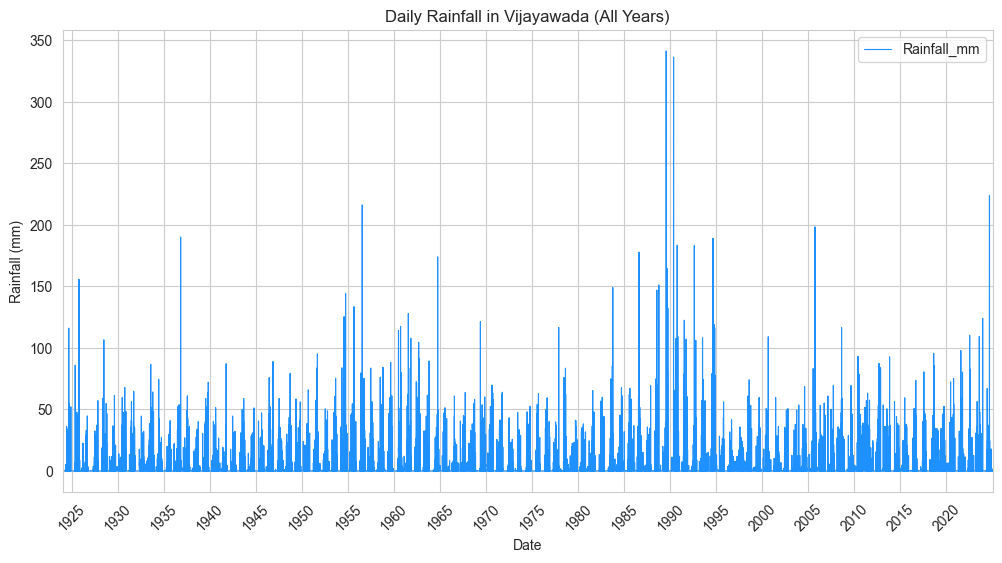

In [23]:
import matplotlib.dates as mdates

# dataset
print("Daily Rainfall Over the Entire Period ---")

# Time Series of all Rainfall Data
df.plot(x='time', y='Rainfall_mm', 
        title='Daily Rainfall in Vijayawada (All Years)',
        ylabel='Rainfall (mm)',
        xlabel='Date',
        color='dodgerblue',
        linewidth=0.8)

plt.gca().xaxis.set_major_locator(mdates.YearLocator(5)) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

plt.show()


average Monthly Rainfall (Seasonal Pattern)
            time  Rainfall_mm  Month
0     1924-01-01          0.0      1
1     1924-01-02          0.0      1
2     1924-01-03          0.0      1
3     1924-01-04          0.0      1
4     1924-01-05          0.0      1
...          ...          ...    ...
36886 2024-12-27          0.0     12
36887 2024-12-28          0.0     12
36888 2024-12-29          0.0     12
36889 2024-12-30          0.0     12
36890 2024-12-31          0.0     12

[36891 rows x 3 columns]


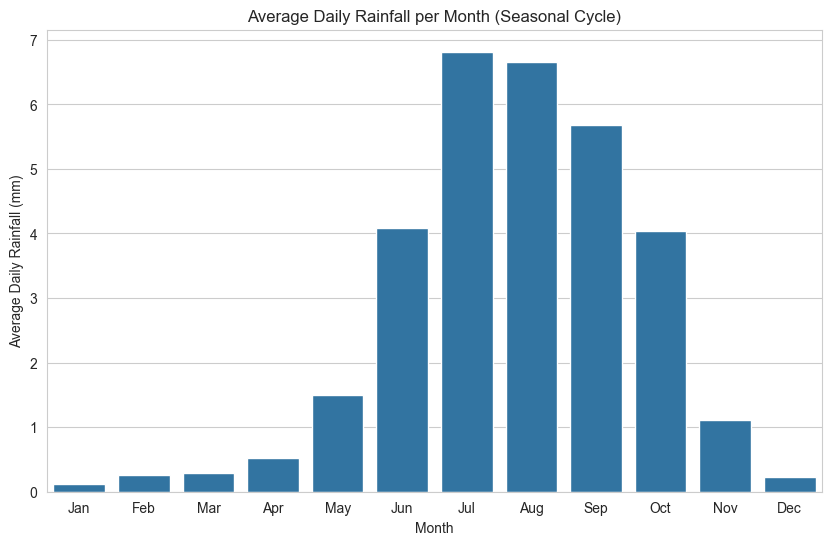

In [24]:
print("average Monthly Rainfall (Seasonal Pattern)")

#Bar Chart of Average Monthly Rainfall
df['Month'] = df['time'].dt.month
print(df)
monthly_df = df.groupby('Month')['Rainfall_mm'].mean().reset_index()
# print(monthly_df)
monthly_df['Month'] = monthly_df['Month'].apply(lambda i: calendar.month_abbr[i])
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_df['Month'], y=monthly_df['Rainfall_mm'])
plt.title('Average Daily Rainfall per Month (Seasonal Cycle)')
plt.ylabel('Average Daily Rainfall (mm)')
plt.xlabel('Month')
plt.show()

Total Annual Rainfall (Year-over-Year Trend) ---


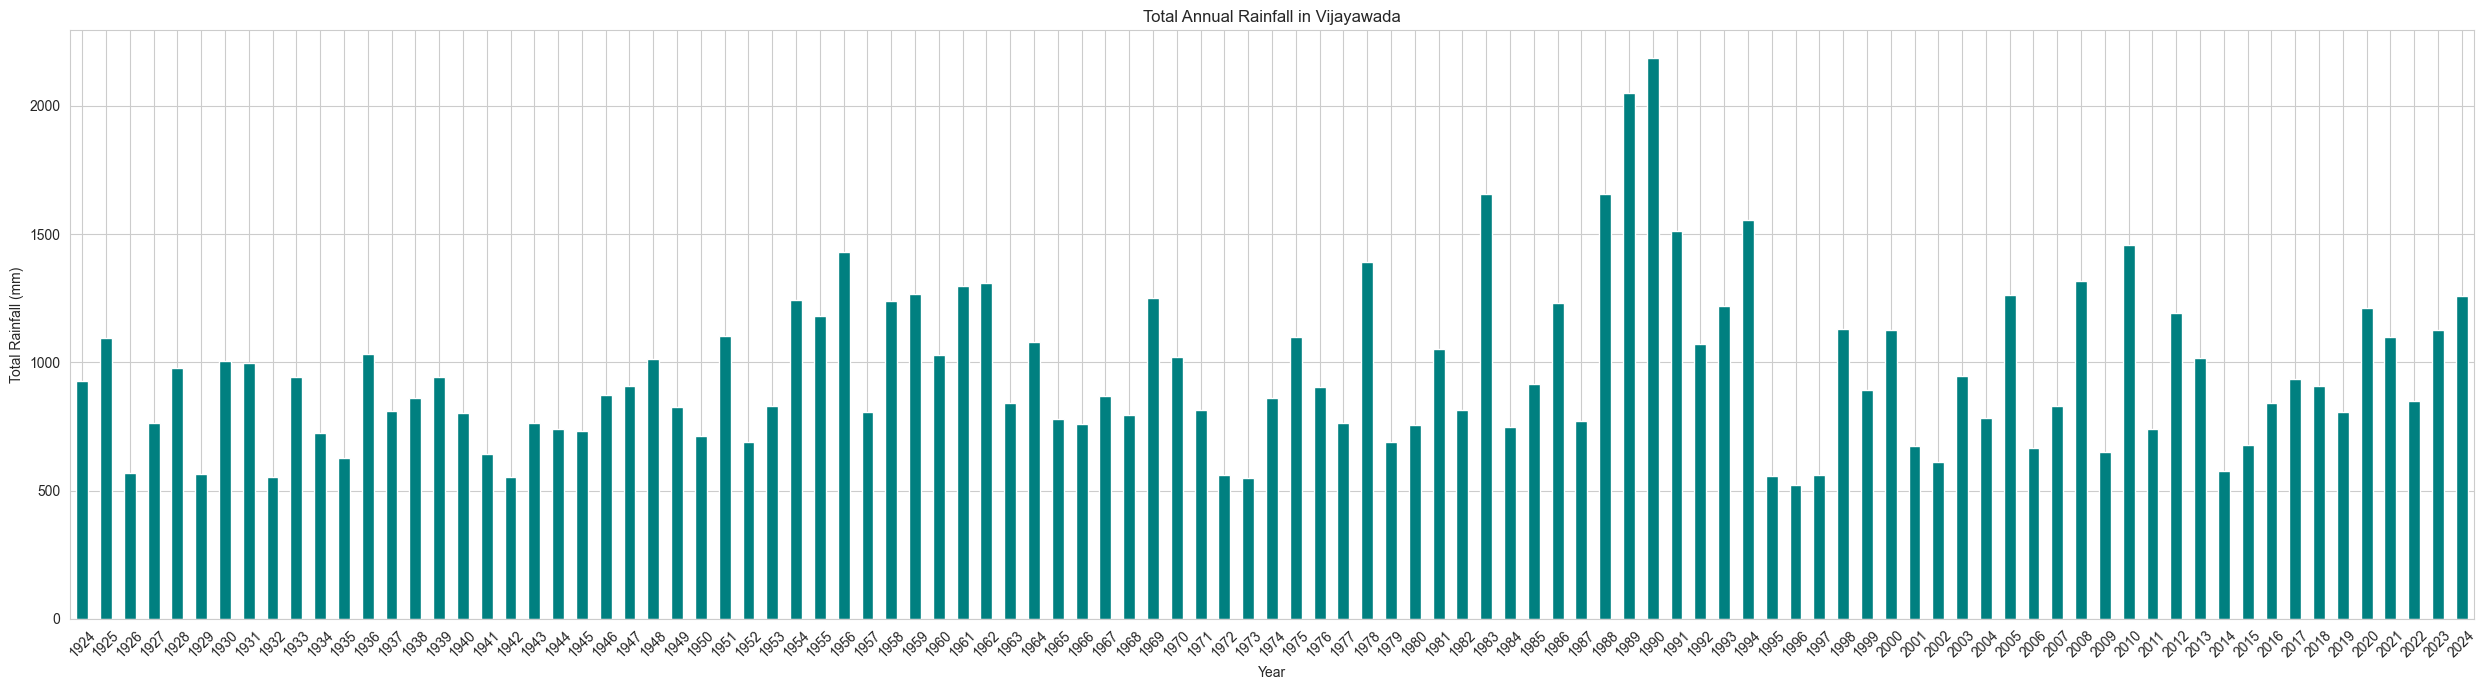

In [25]:
print("Total Annual Rainfall (Year-over-Year Trend) ---")
#Bar Chart of Total Annual Rainfall
yearly_total_rain = df.groupby(df['time'].dt.year)['Rainfall_mm'].sum()
#index= year
plt.figure(figsize=(25, 7))
yearly_total_rain.plot(kind='bar', color='teal')
plt.title('Total Annual Rainfall in Vijayawada')
plt.ylabel('Total Rainfall (mm)')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Distribution of Rainfall Amounts ---
43       1.138874
123      5.205294
124      0.166858
126      0.197726
139      0.180762
           ...   
36861    0.590970
36864    0.539709
36879    0.144838
36884    1.548654
36885    1.177457
Name: Rainfall_mm, Length: 10012, dtype: float64


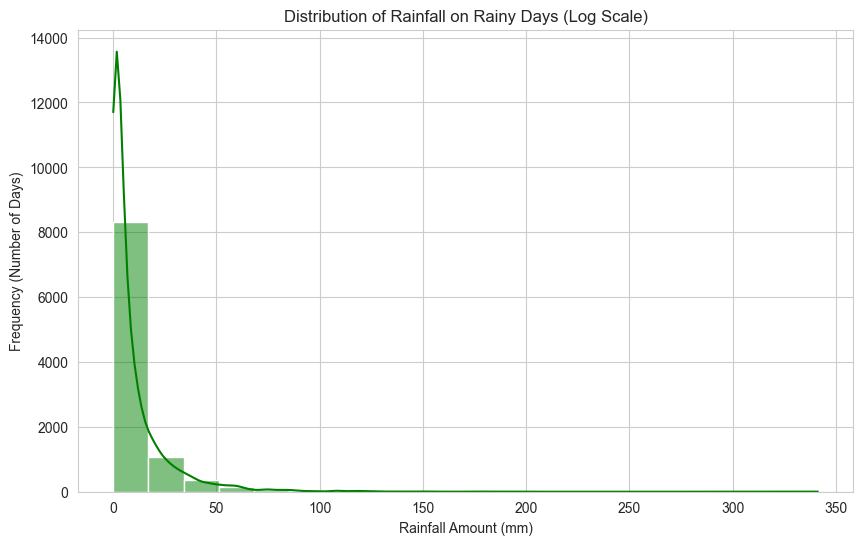

In [26]:

print("Distribution of Rainfall Amounts ---")

#Histogram of Rainfall on Rainy Days
rainy_days_data = df[df['Rainfall_mm'] > 0]['Rainfall_mm']
print(rainy_days_data)#series
plt.figure(figsize=(10, 6))
sns.histplot(rainy_days_data, bins=20, kde=True, color='green')
# plt.yscale('log')#to see very well  small values
plt.title('Distribution of Rainfall on Rainy Days (Log Scale)')
plt.xlabel('Rainfall Amount (mm)')
plt.ylabel('Frequency (Number of Days)')
plt.show()

<Axes: xlabel='Rainfall_mm', ylabel='Count'>

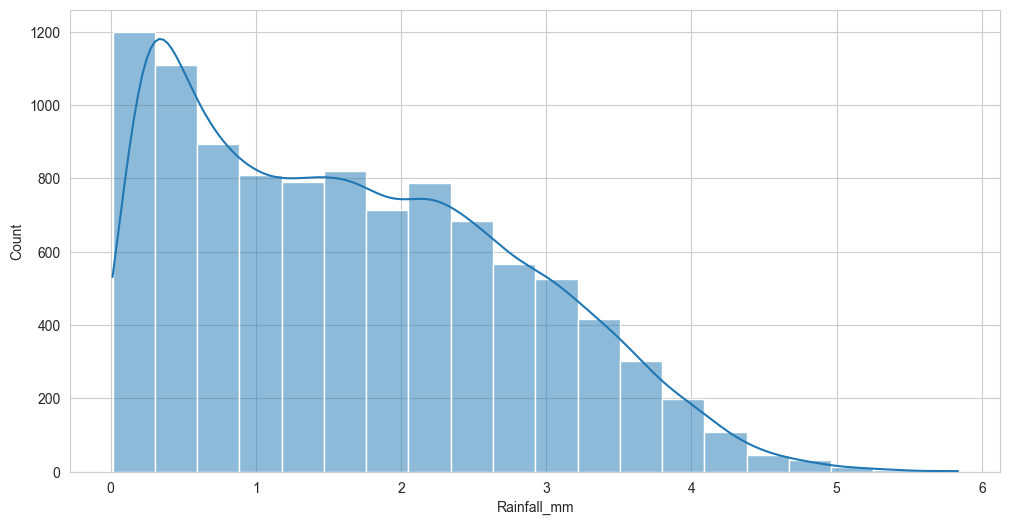

In [27]:
#log transformation
import numpy as np
rainy_days_data_log = np.log1p(rainy_days_data)#log(1 + x) to handle 0
sns.histplot(rainy_days_data_log, bins=20, kde=True)


0        Dry
1        Dry
2        Dry
3        Dry
4        Dry
        ... 
36886    Dry
36887    Dry
36888    Dry
36889    Dry
36890    Dry
Name: category, Length: 36891, dtype: object


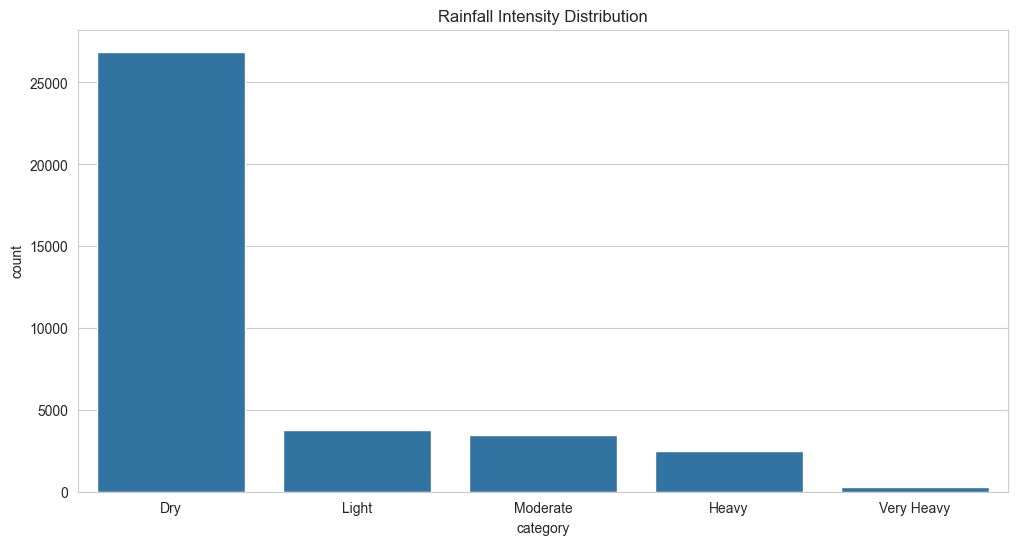

In [28]:
def rain_category(mm):
    if mm == 0: return 'Dry'
    elif mm <= 2: return 'Light'
    elif mm <= 10: return 'Moderate'
    elif mm <= 50: return 'Heavy'
    else: return 'Very Heavy'

df['category'] = df['Rainfall_mm'].apply(rain_category)
print(df['category'])
sns.countplot(x='category', data=df, order=['Dry', 'Light', 'Moderate', 'Heavy', 'Very Heavy'])
plt.title("Rainfall Intensity Distribution")
plt.show()
